In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime

#Importamos excel de datos
datos = pd.read_excel("bdd/audios_datos.xlsx")
#Ver tabla de datos
datos

,Paciente,Archivo_audio,F0,F1,F2,F3,F4,Intensidad_Media,Jitter,Shimmer%,...,F3_H,F4_H,Intensidad_Media_H,Jitter_H,Shimmer%_H,ShimmerdB_H,HNR_H,Año_Nacimiento,Género,hora_Audio
0,Francisca Oliva,Francisca_Oliva_4_2024-07-18_16-50-26_Escala_v...,115.5,638.5,1535.3,2732.9,3615.5,71.09,0.027576,0.130412,...,2932.9,3115.5,82.09,0.077576,0.120412,1.4959,8.11,1992,F,16


In [2]:

datos = datos.rename(columns={'Archivo audio':'Archivo_audio','Intensidad Media': 'Intensidad_Media' , 'Shimmer %': 'Shimmer%' , 'Shimmer dB': 'ShimmerdB'
                             , 'F0 H': 'F0_H', 'F1 H': 'F1_H', 'F2 H': 'F2_H', 'F3 H': 'F3_H', 'F4 H': 'F4_H', 'Intensidad Media H': 'Intensidad_Media_H', 
                              'Jitter H': 'Jitter_H', 'Shimmer % H': 'Shimmer%_H', 'Shimmer dB H': 'ShimmerdB_H', 'HNR H': 'HNR_H',
                              'NHR H': 'NHR_H', 'Año Nacimiento': 'Año_Nacimiento', 'hora  Audio': 'hora_Audio'})

In [3]:
print(datos.columns)

Index(['Paciente', 'Archivo_audio', 'F0', 'F1', 'F2', 'F3', 'F4',
       'Intensidad_Media', 'Jitter', 'Shimmer%', 'ShimmerdB', 'HNR', 'F0_H',
       'F1_H', 'F2_H', 'F3_H', 'F4_H', 'Intensidad_Media_H', 'Jitter_H',
       'Shimmer%_H', 'ShimmerdB_H', 'HNR_H', 'Año_Nacimiento', 'Género',
       'hora_Audio'],
      dtype='object')


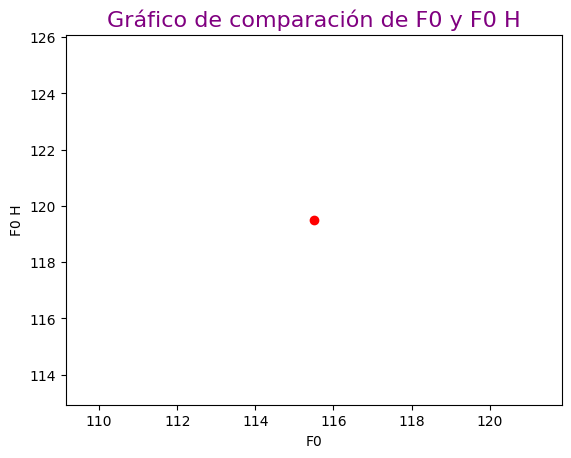

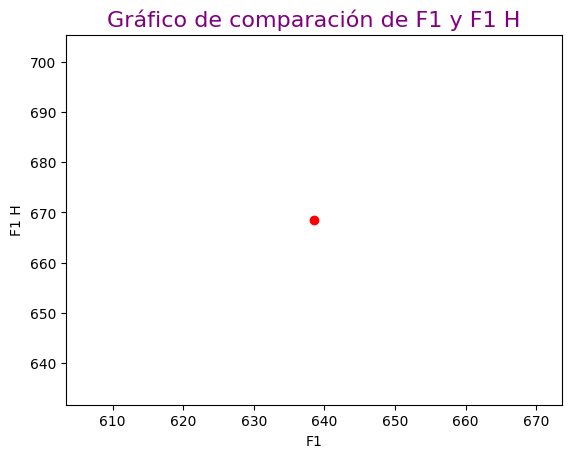

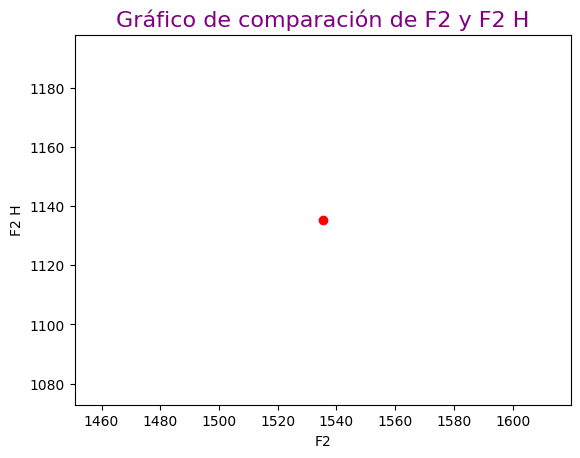

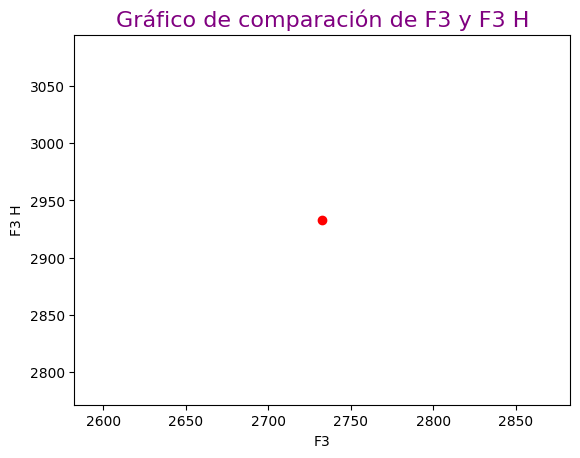

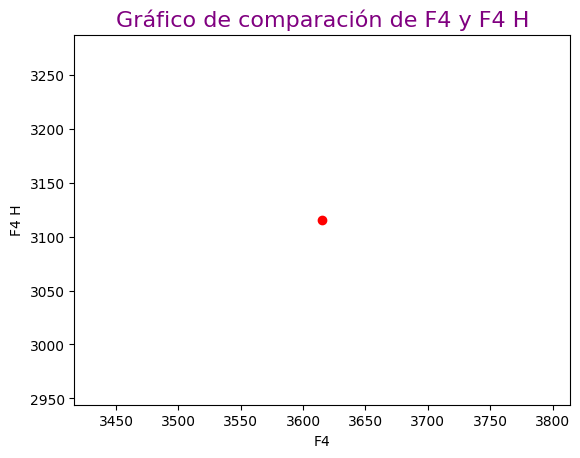

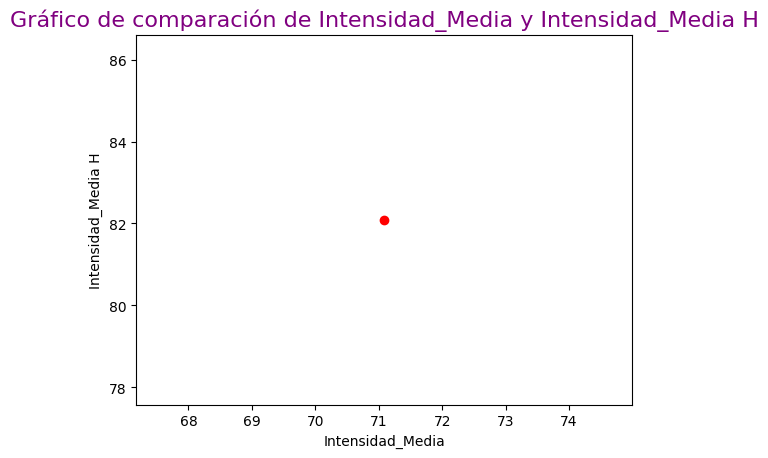

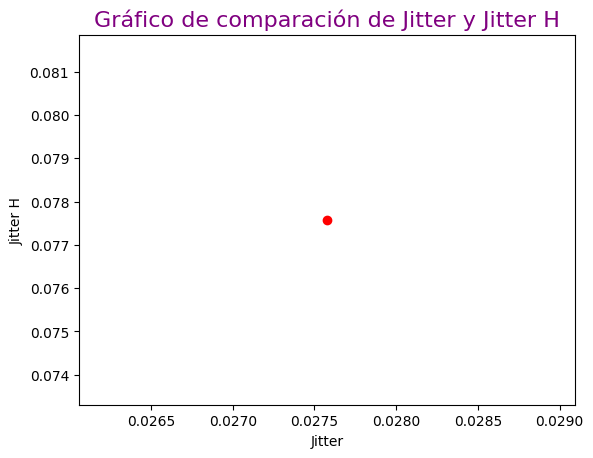

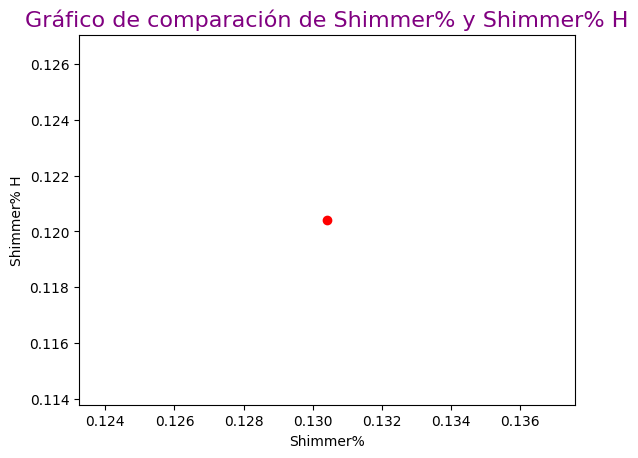

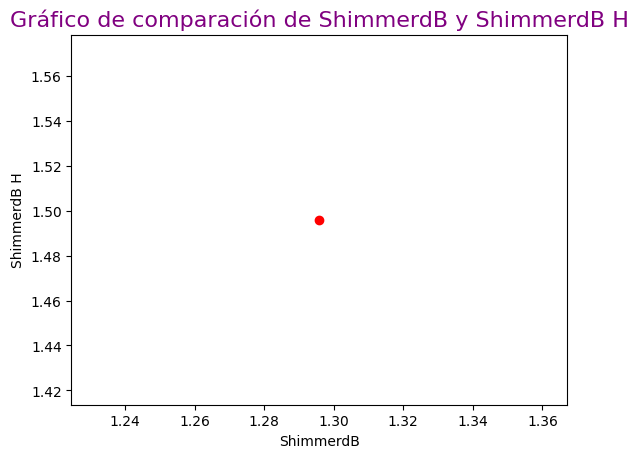

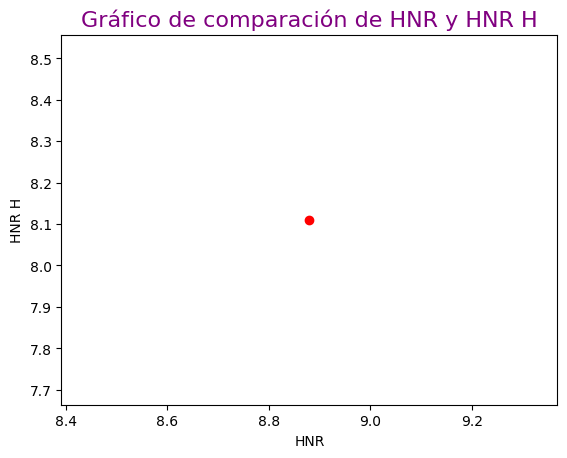

In [4]:
variables = ["F0", "F1", "F2", "F3", "F4", "Intensidad_Media", "Jitter", "Shimmer%", "ShimmerdB", "HNR"]

for variable in variables:
    fig, ax = plt.subplots()
    ax.scatter(datos[variable], datos[f'{variable}_H'], c= "red")

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.title(f"Gráfico de comparación de {variable} y {variable} H", fontsize=16, color="purple")

    file_name = f'grafico_comparacion_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis_prueba/dispersion_hvm/{file_name}'

    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    
    plt.show()

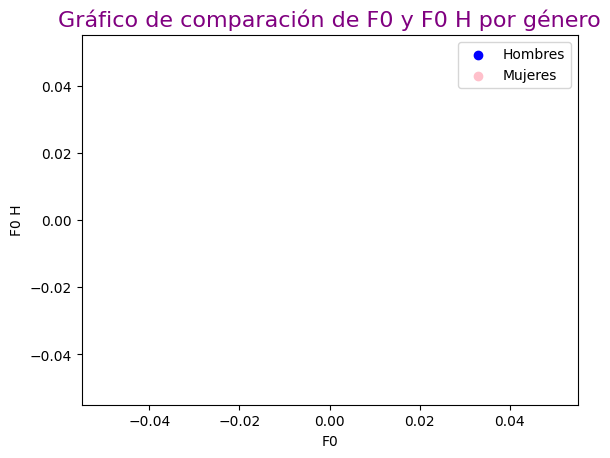

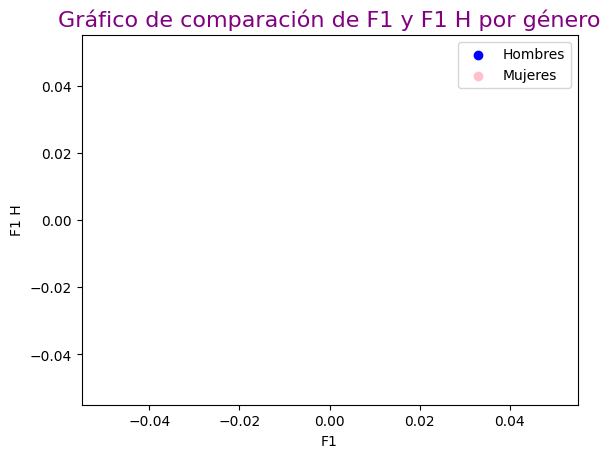

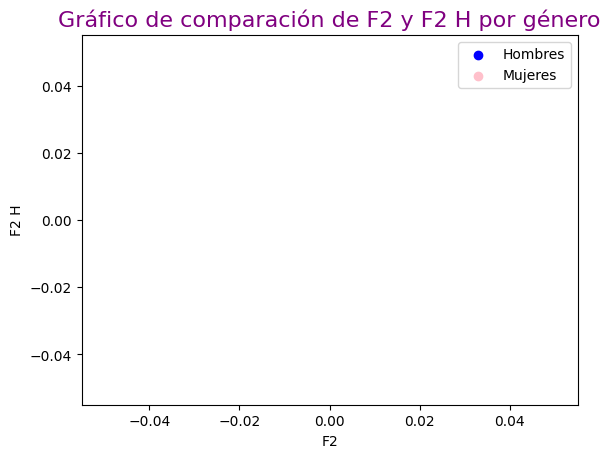

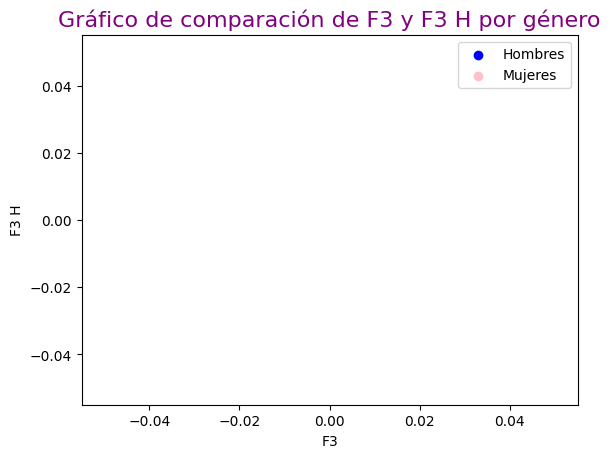

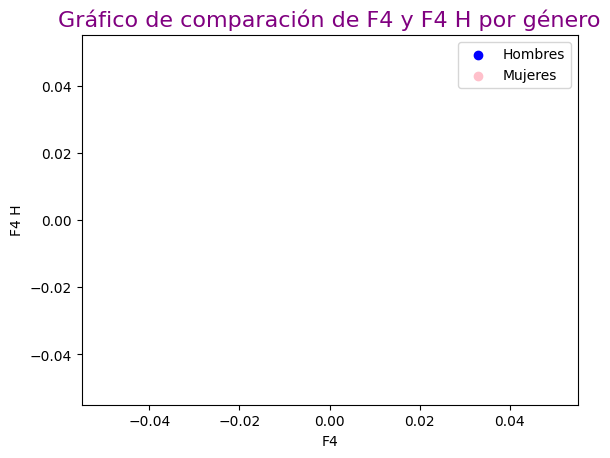

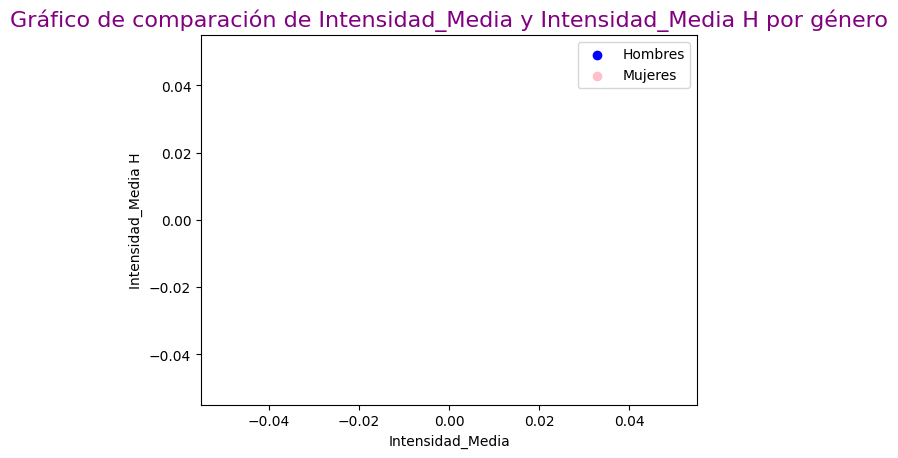

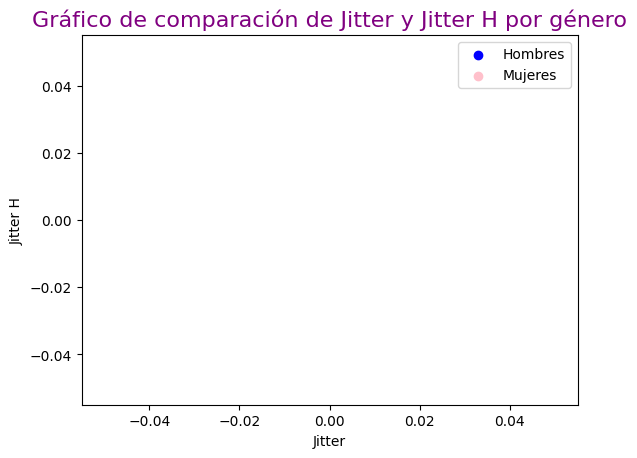

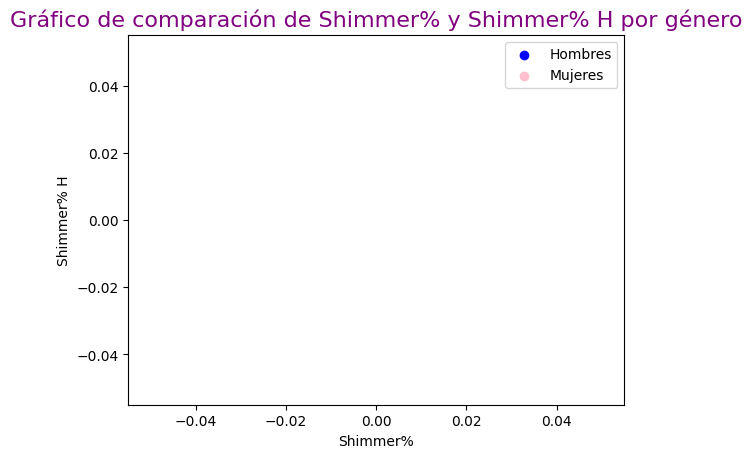

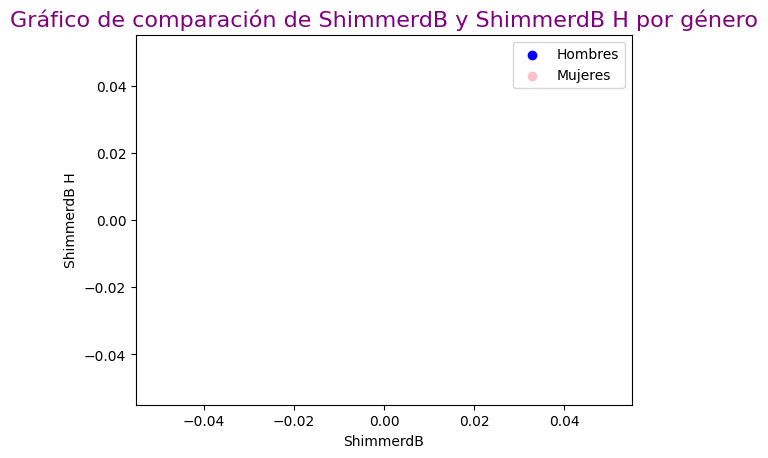

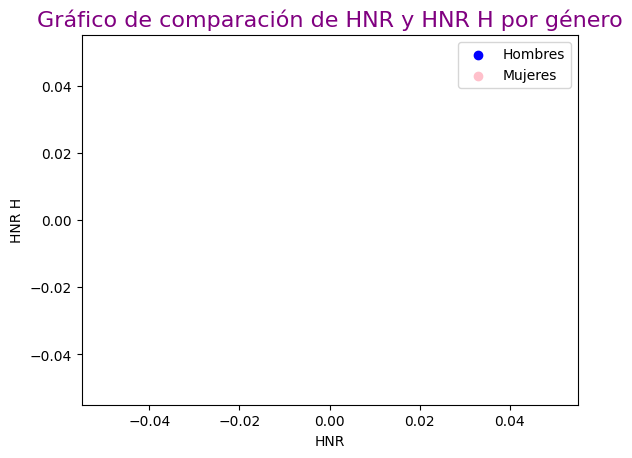

In [5]:
datos_hombres = datos[datos['Género'] == 'H']
datos_mujeres = datos[datos['Género'] == 'M']

variables = ["F0", "F1", "F2", "F3", "F4", "Intensidad_Media", "Jitter", "Shimmer%", "ShimmerdB", "HNR"]

for variable in variables:
    fig, ax = plt.subplots()
    ax.scatter(datos_hombres[variable], datos_hombres[f'{variable}_H'], c="blue", label='Hombres')
    ax.scatter(datos_mujeres[variable], datos_mujeres[f'{variable}_H'], c="pink", label='Mujeres')

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.title(f"Gráfico de comparación de {variable} y {variable} H por género", fontsize=16, color="purple")

    plt.legend()

    file_name = f'grafico_comparacion_generos_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_generos/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis_prueba/dispersion_hvm_generos/{file_name}'

    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    
    plt.show()

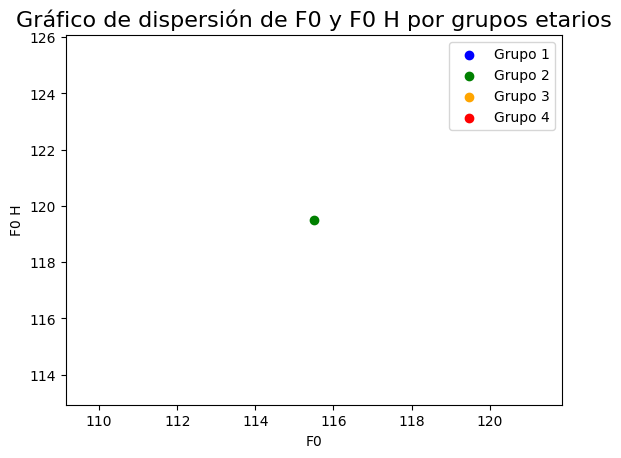

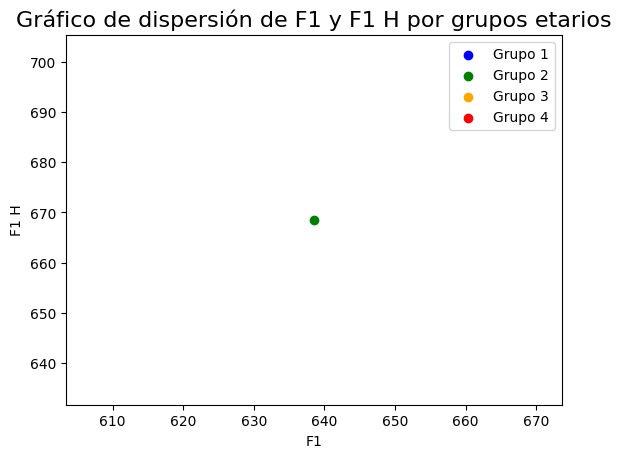

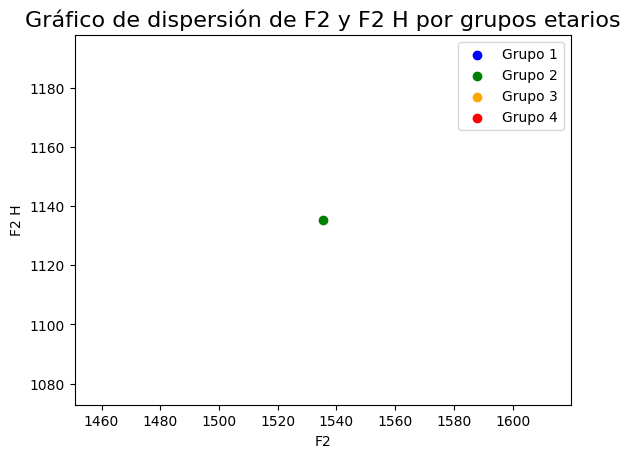

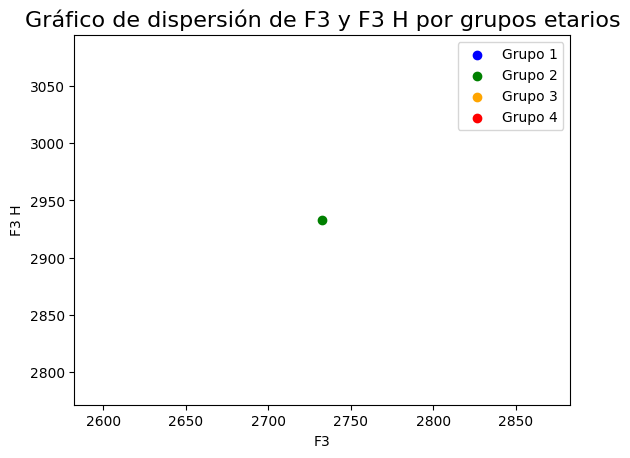

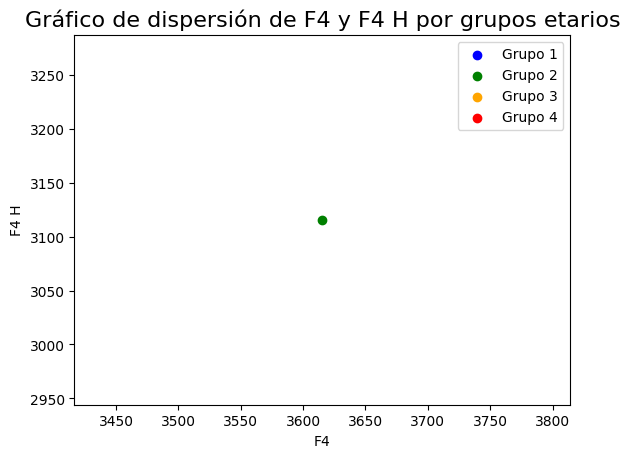

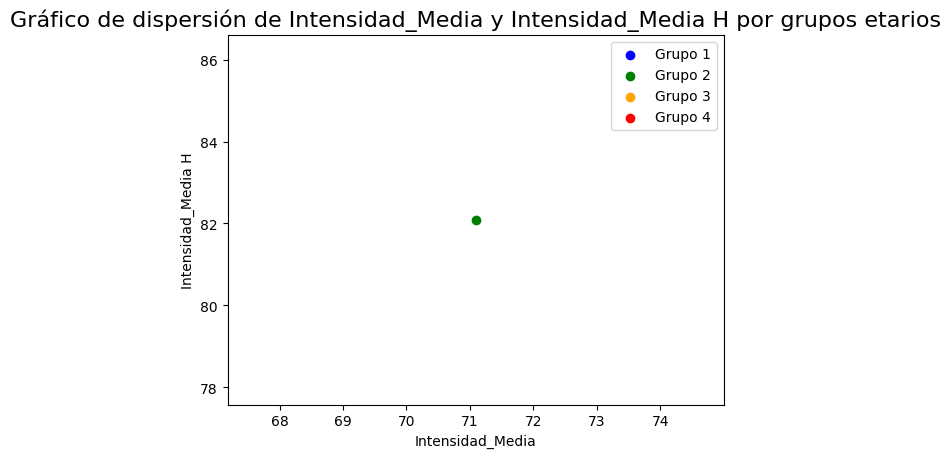

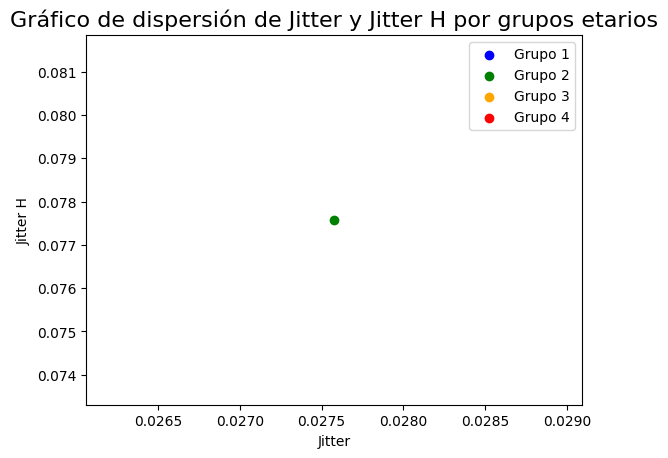

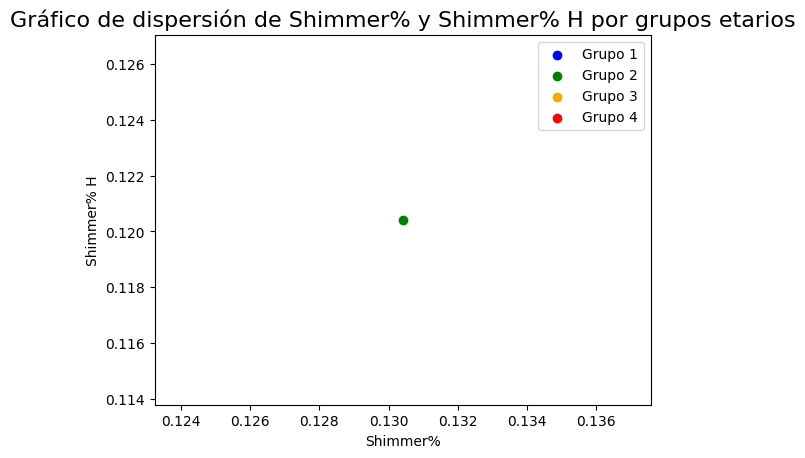

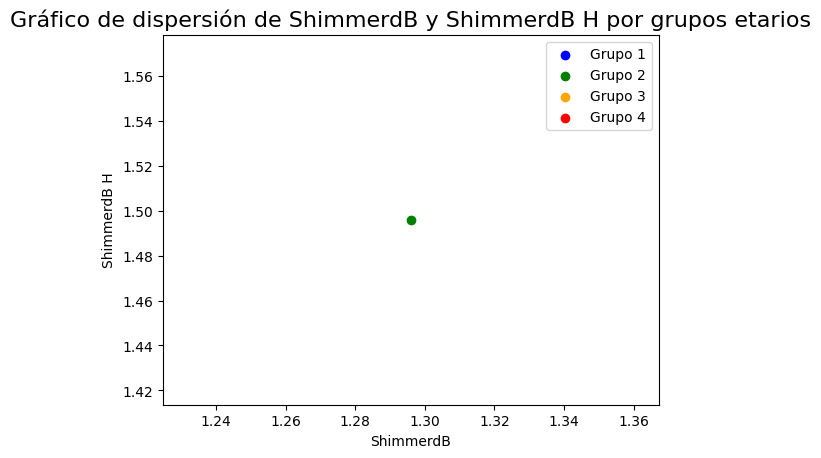

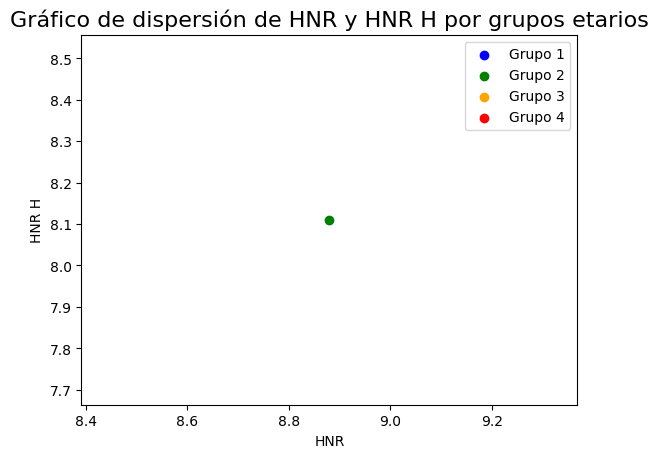

In [6]:
año_actual = datetime.now().year
datos['edad'] = año_actual - datos['Año_Nacimiento']
bins = [0, 18, 35, 59, 90]
labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
datos['grupo_etario'] = pd.cut(datos['edad'], bins=bins, labels=labels)

variables = ["F0", "F1", "F2", "F3", "F4", "Intensidad_Media", "Jitter", "Shimmer%", "ShimmerdB", "HNR"]

for variable in variables:
    fig, ax = plt.subplots()

    for grupo, color in zip(labels, ['blue', 'green', 'orange', 'red']):
        grupo_datos = datos[datos['grupo_etario'] == grupo]
        ax.scatter(grupo_datos[variable], grupo_datos[f'{variable}_H'], label=grupo, c=color)

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.legend()

    plt.title(f"Gráfico de dispersión de {variable} y {variable} H por grupos etarios", fontsize=16)

    file_name = f'grafico_comparacion_edad_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_edad/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis_prueba/dispersion_hvm_edad/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    plt.show()

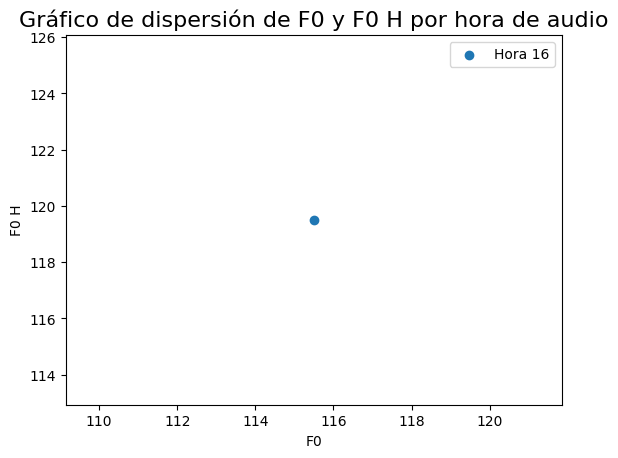

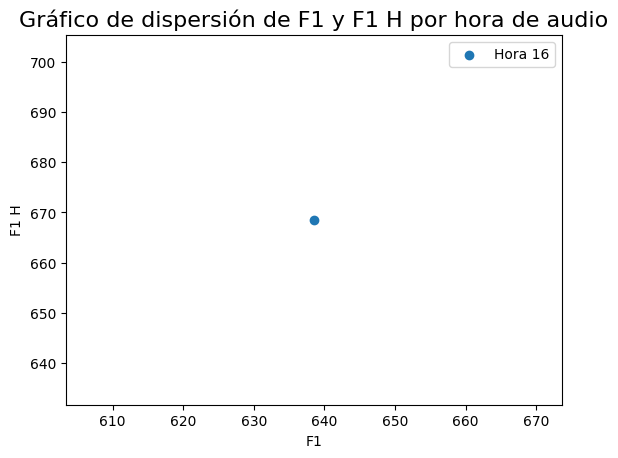

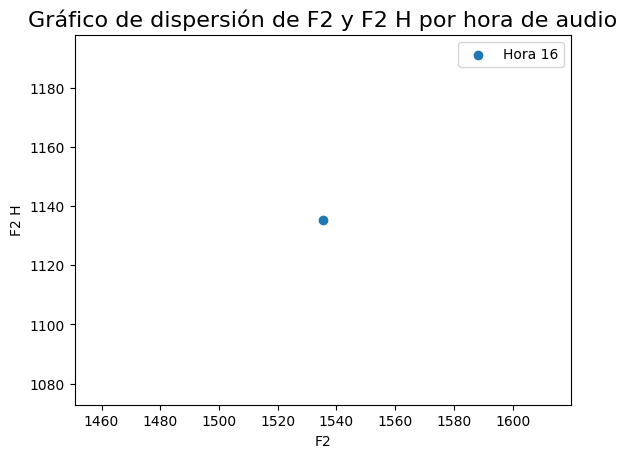

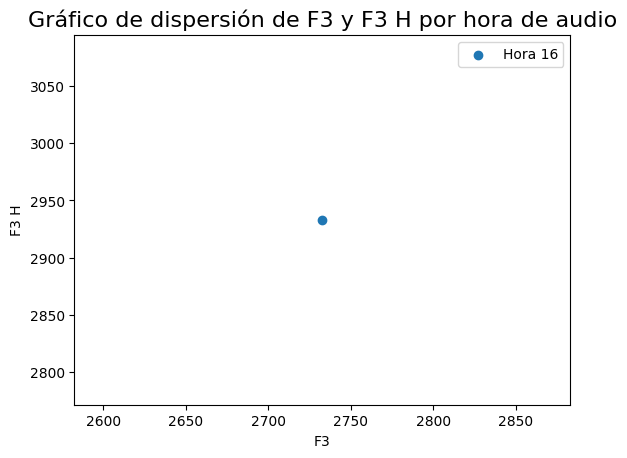

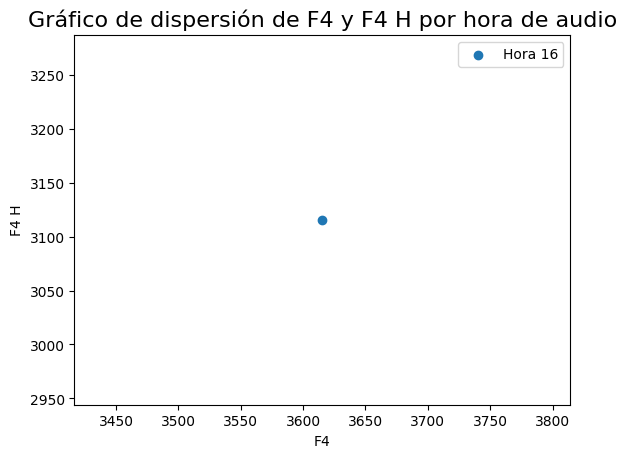

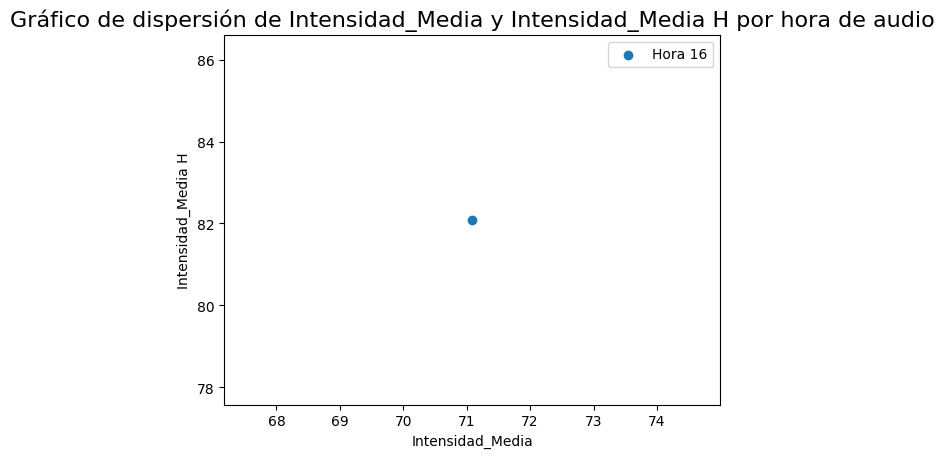

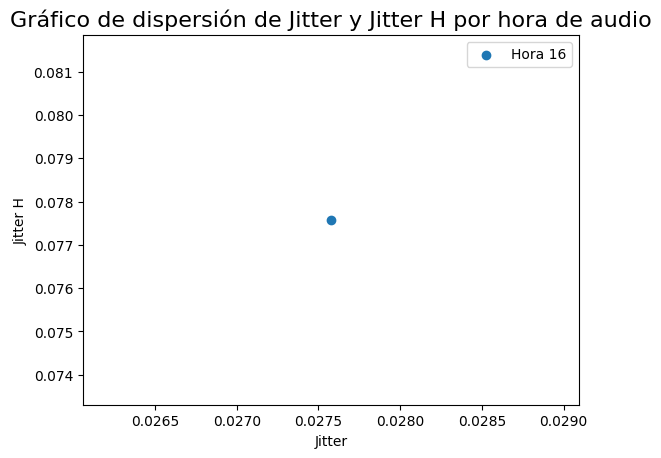

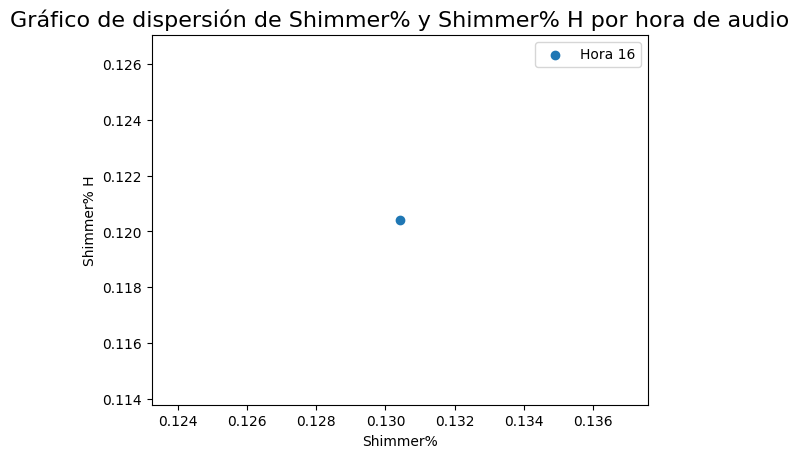

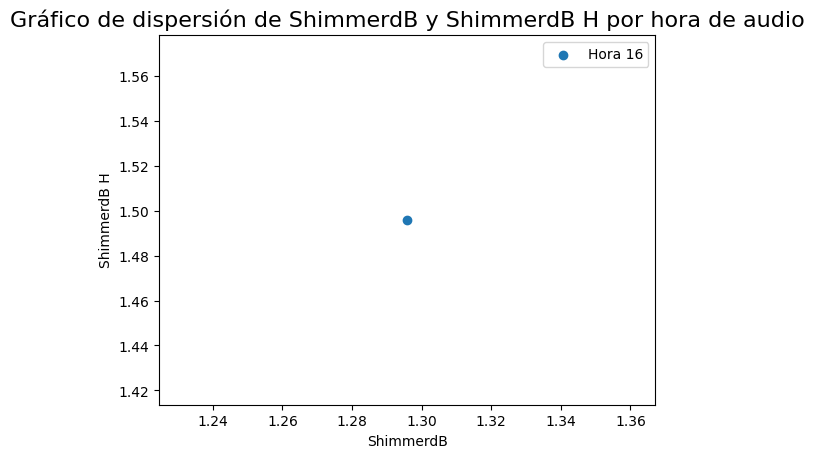

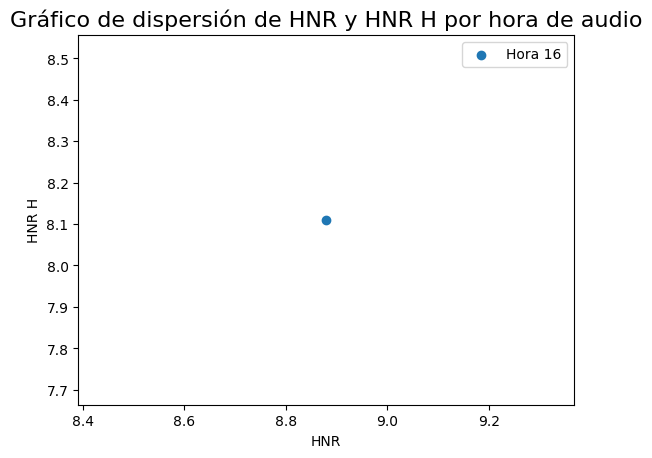

In [7]:
for variable in variables:
    fig, ax = plt.subplots()

    horas_unicas = datos['hora_Audio'].unique()
    
    for hora in horas_unicas:
        hora_datos = datos[datos['hora_Audio'] == hora]
        ax.scatter(hora_datos[variable], hora_datos[f'{variable}_H'], label=f'Hora {hora}')

    ax.set_xlabel(variable)
    ax.set_ylabel(f'{variable} H')

    plt.legend()

    plt.title(f"Gráfico de dispersión de {variable} y {variable} H por hora de audio", fontsize=16)

    file_name = f'grafico_comparacion_hr_grabacion_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_hr_grabacion/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis_prueba/dispersion_hvm_hr_grabacion/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    
    plt.show()

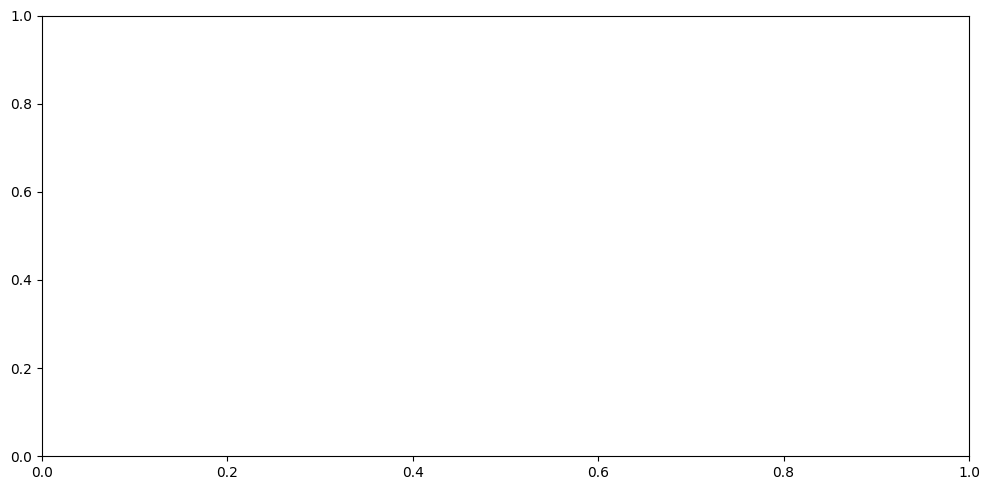

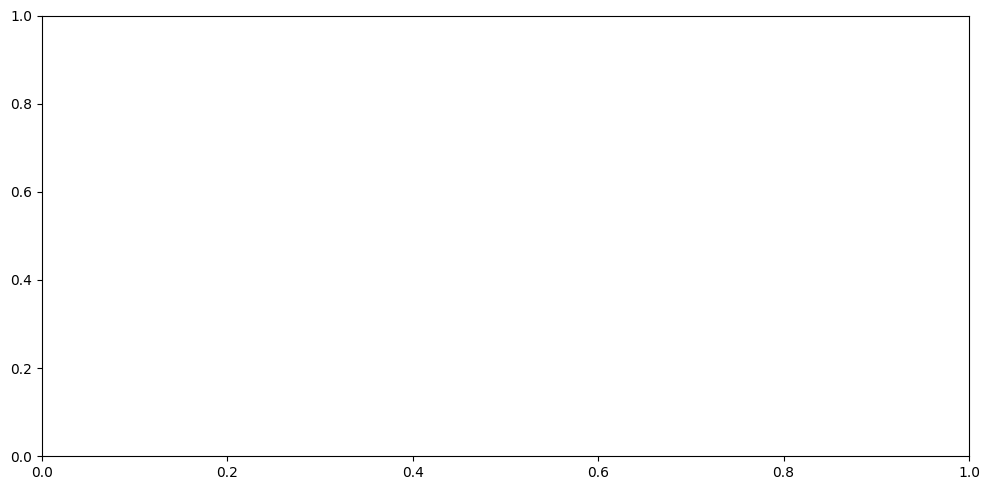

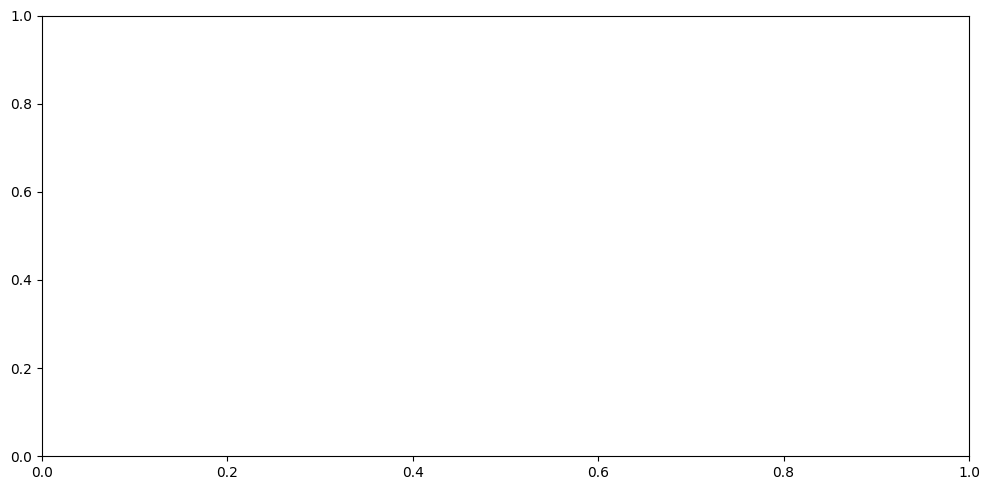

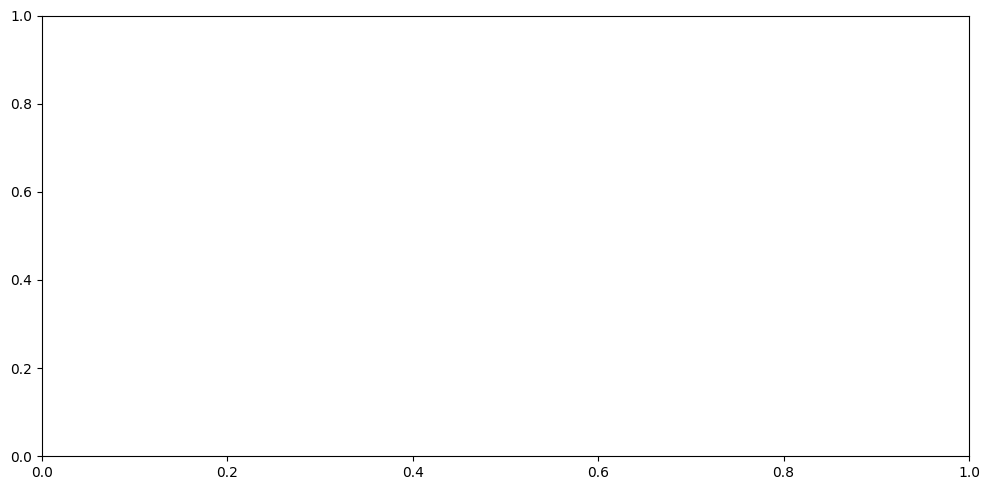

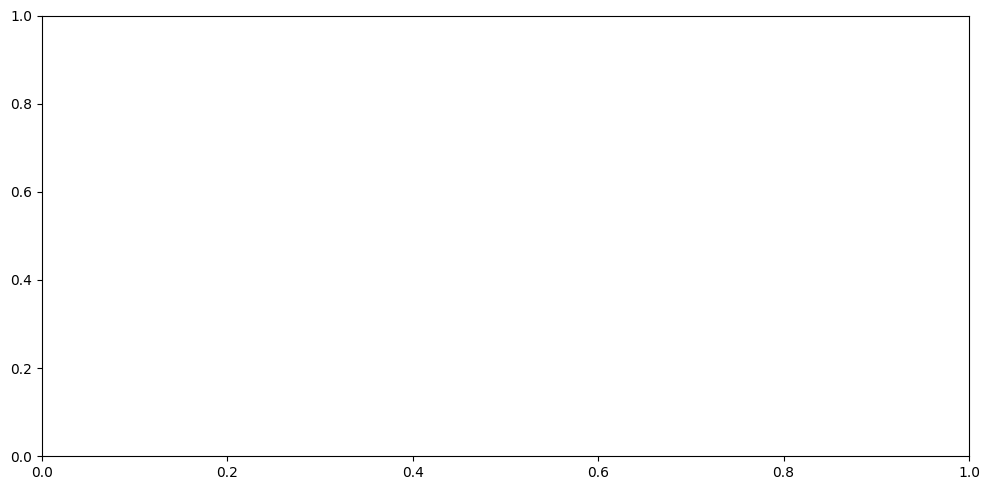

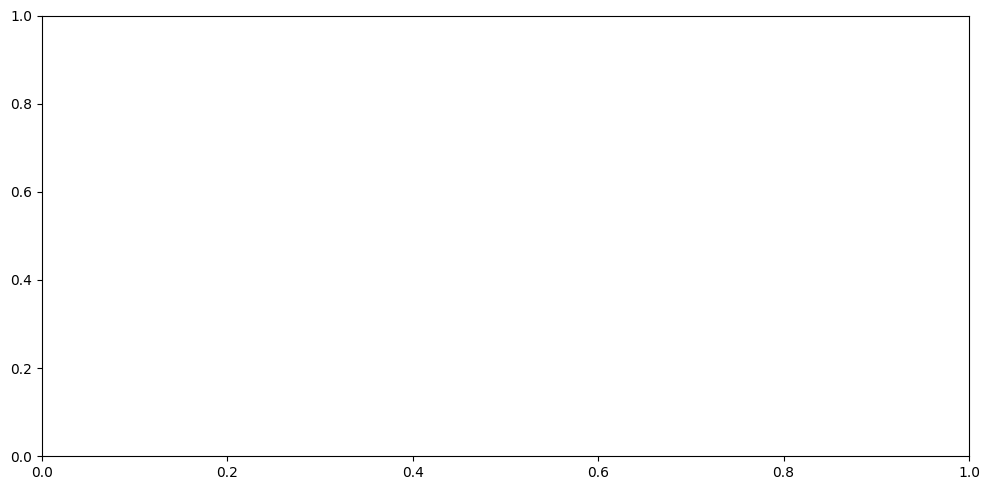

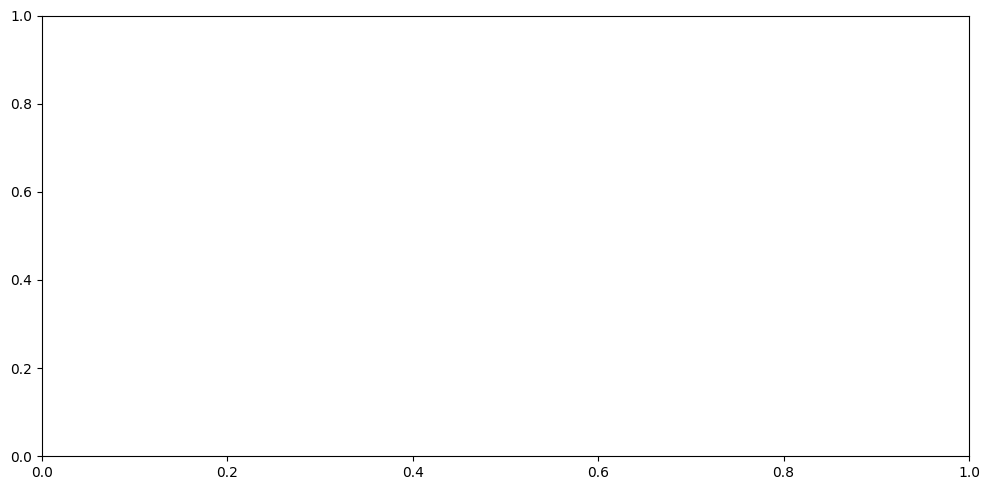

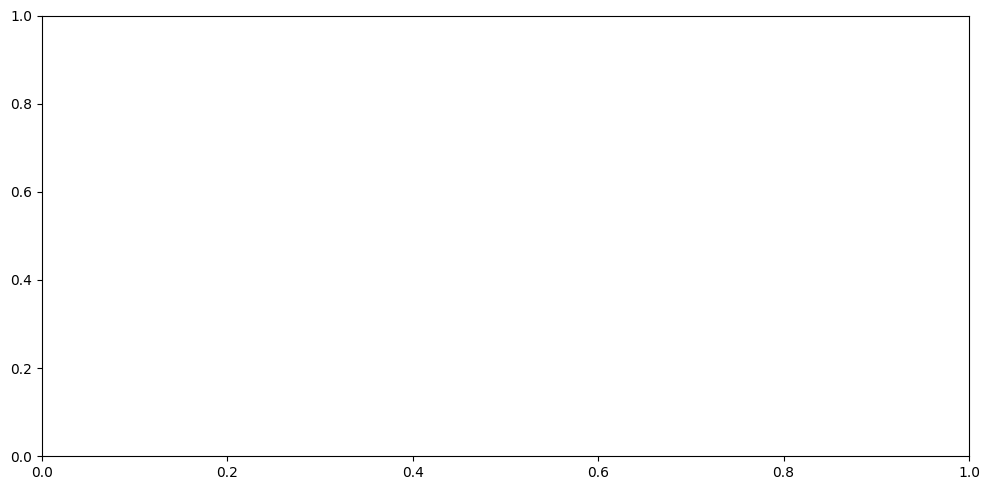

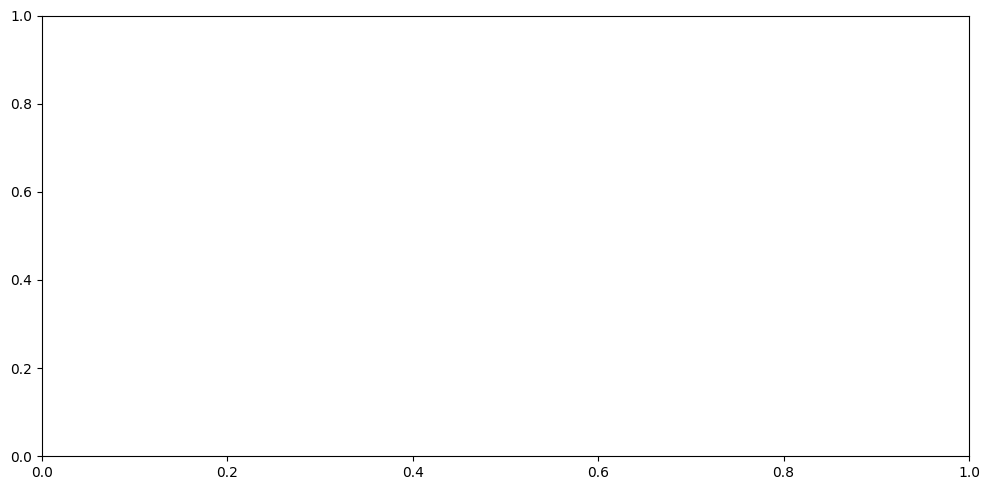

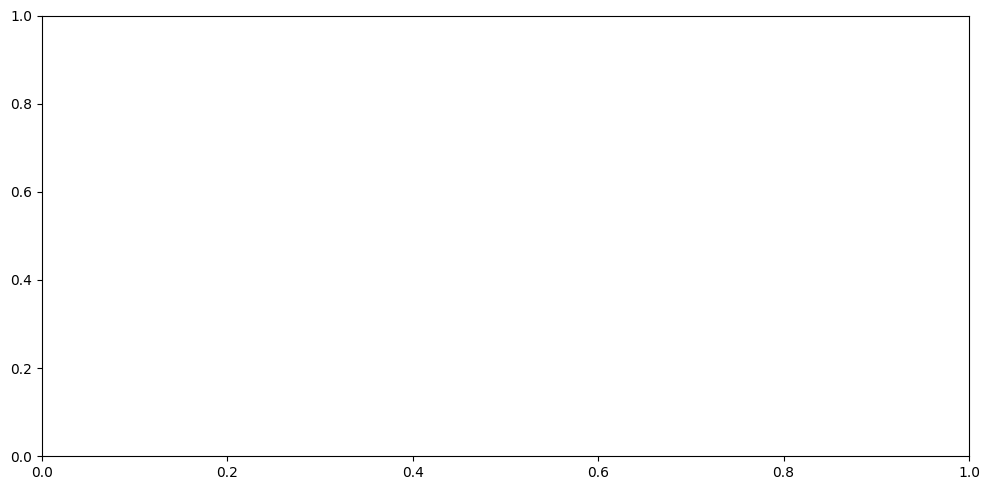

In [11]:
for variable in variables:
    num_pacientes = len(datos['Paciente'].unique())
    fig, axs = plt.subplots(len(datos['Paciente'].unique()), 1, figsize=(10, 5 * len(datos['Paciente'].unique())))

    # Asegúrate de que axs sea siempre una lista
    if num_pacientes == 1:
        axs = [axs]
    
    for i, paciente in enumerate(datos['Paciente'].unique()):
        paciente_datos = datos[datos['Paciente'] == paciente]
            
        ax = axs[i]
        
        for hora in paciente_datos['hora_Audio'].unique():
            hora_datos = paciente_datos[paciente_datos['hora_Audio'] == hora]
            ax.scatter(hora_datos[variable], hora_datos[f'{variable}_H'], label=f'Hora {hora}')
        
        ax.set_xlabel(variable)
        ax.set_ylabel(f'{variable} H')
        
        ax.legend()
        
        ax.set_title(f"Gráfico de dispersión para {paciente} por hora de grabación")

    plt.tight_layout()

    file_name = f'grafico_comparacion_hr_paciente_{variable}_{variable}H.png'
    #file_path = f'graficos/deepnote_analisis/dispersion_hvm_hr_paciente/{file_name}'
    file_path = f'../../media/graficos/deepnote_analisis_prueba/dispersion_hvm_hr_paciente/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    plt.show()

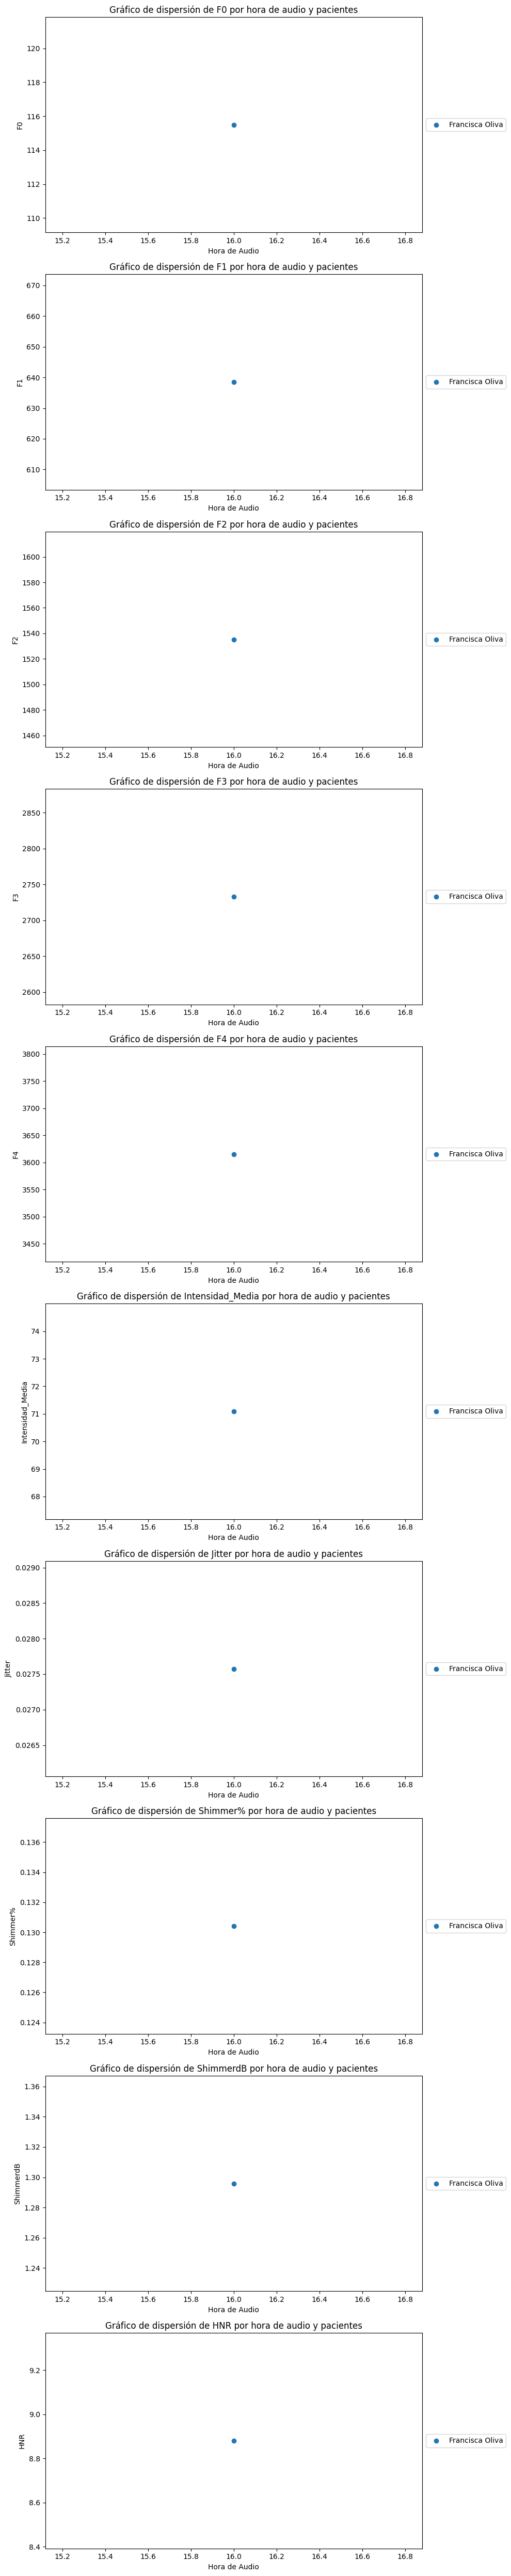

In [9]:
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)))

for i, variable in enumerate(variables):
    ax = axs[i]
    
    for paciente in datos['Paciente'].unique():
        paciente_datos = datos[datos['Paciente'] == paciente]
        
        ax.scatter(paciente_datos['hora_Audio'], paciente_datos[variable], label=f'{paciente}')

    ax.set_xlabel('Hora de Audio')
    ax.set_ylabel(variable)
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(f"Gráfico de dispersión de {variable} por hora de audio y pacientes")

plt.tight_layout()

file_name = f'grafico_variacion_m_hora_{variable}_{variable}H.png'
#file_path = f'graficos/deepnote_analisis/variacion_m_hora/{file_name}'
file_path = f'../../media/graficos/deepnote_analisis_prueba/variacion_m_hora/{file_name}'

# Save the plot
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()